The motivation behind this comprehensive analysis is to gain a deeper understanding of factors contributing to customer churn in order to develop targeted strategies for customer retention. Each of these analyses allows us to examine specific customer characteristics, service types, and behaviors that may correlate with higher churn rates. By understanding these patterns, the company can design retention initiatives, improve customer satisfaction, and optimize service offerings.


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ensure inline plotting
%matplotlib inline

In [4]:
df = pd.read_csv('/content/processed_telco_customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0,34,56.95,1889.50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,2,53.85,108.15,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,0,45,42.30,1840.75,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,1,0,2,70.70,151.65,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [6]:
# Check data loading and transformations
print(df.head())
print(df.columns)

   customerID  gender  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG       1              0       1           29.85         29.85   
1  5575-GNVDE       0              0      34           56.95       1889.50   
2  3668-QPYBK       0              0       2           53.85        108.15   
3  7795-CFOCW       0              0      45           42.30       1840.75   
4  9237-HQITU       1              0       2           70.70        151.65   

   Churn  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0      0            1               0                 0  ...   
1      0            0               0                 1  ...   
2      1            0               0                 1  ...   
3      0            0               0                 0  ...   
4      1            0               0                 1  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0  

Plot 1: Contract Type vs. Churn

    Heading: "Churn Rate by Contract Type"
    Description: Analyzing how different contract types (month-to-month, one year, two years) impact churn rates.

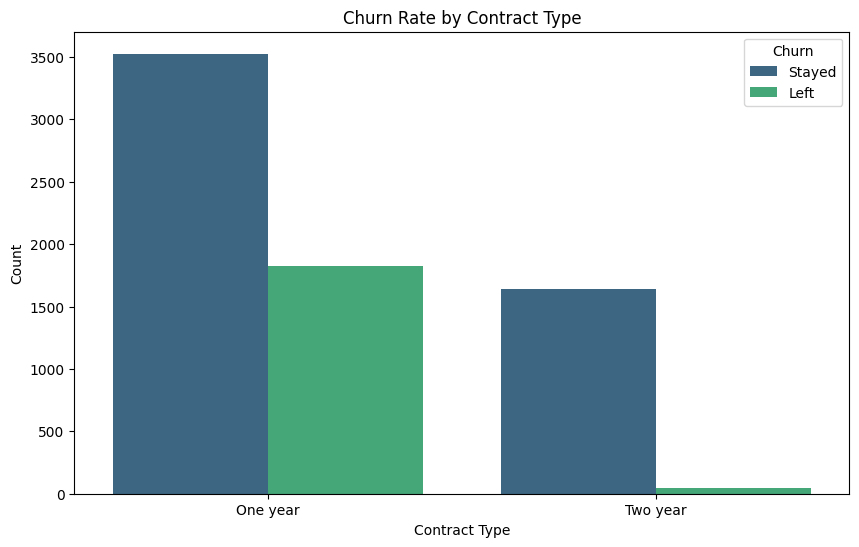

In [7]:
# ---- 1. Contract Type vs. Churn ----
# Convert 'Contract' back to readable categories
df['Contract'] = df[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df['Contract'] = df['Contract'].replace({'Contract_One year': 'One year', 'Contract_Two year': 'Two year'}).fillna('Month-to-month')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette="viridis")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.show()

Plot 2: Monthly Charges by Churn Status

    Heading: "Monthly Charges Distribution by Churn Status"
    Description: Visualizing the distribution of monthly charges for customers who churned versus those who stayed.

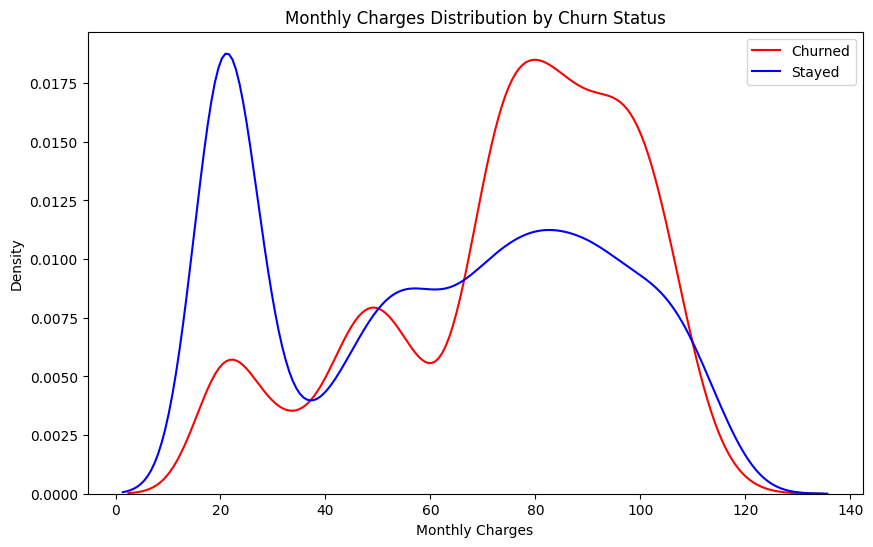

In [8]:
# ---- 2. Monthly Charges by Churn Status ----
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 1], x='MonthlyCharges', color='red', label='Churned')
sns.kdeplot(data=df[df['Churn'] == 0], x='MonthlyCharges', color='blue', label='Stayed')
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()


Plot 3: Tenure Distribution by Churn

    Heading: "Tenure Distribution by Churn Status"
    Description: Showing how long customers stayed with the company before churning.

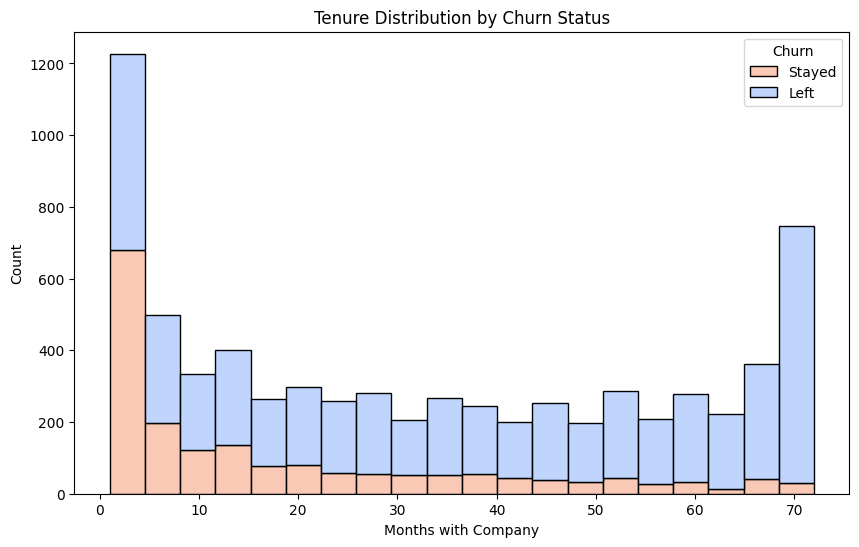

In [9]:
# ---- 3. Tenure Distribution by Churn ----
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", palette="coolwarm", bins=20)
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Months with Company")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.show()


Plot 4: Streaming TV and Churn

    Heading: "Churn Rate by Streaming TV Service Subscription"
    Description: Examining whether subscribing to streaming TV services influences churn.

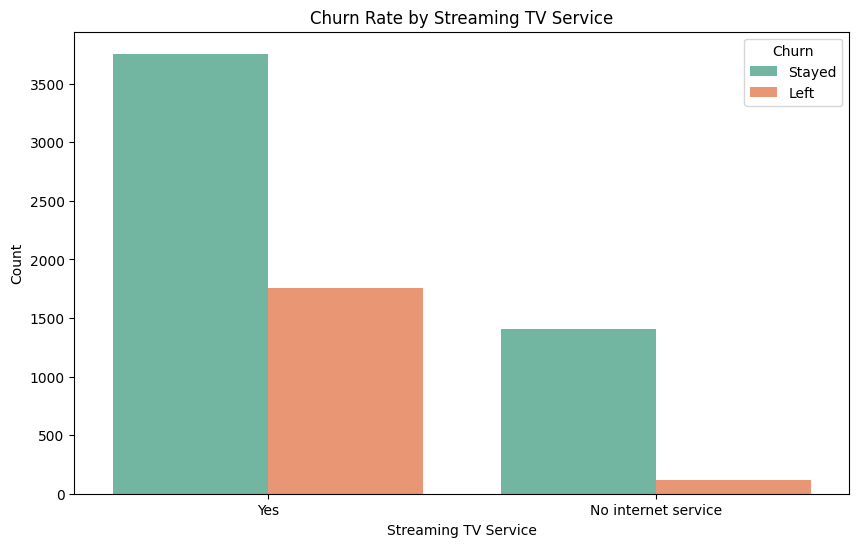

In [10]:
# ---- 4. Streaming TV and Churn ----
df['StreamingTV'] = df[['StreamingTV_Yes', 'StreamingTV_No internet service']].idxmax(axis=1)
df['StreamingTV'] = df['StreamingTV'].replace({'StreamingTV_Yes': 'Yes', 'StreamingTV_No internet service': 'No internet service'}).fillna('No')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette="Set2")
plt.title("Churn Rate by Streaming TV Service")
plt.xlabel("Streaming TV Service")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.show()


Plot 5: Senior Citizen Status and Churn

    Heading: "Churn Rate by Senior Citizen Status"
    Description: Comparing churn rates between senior citizens and non-senior citizens.

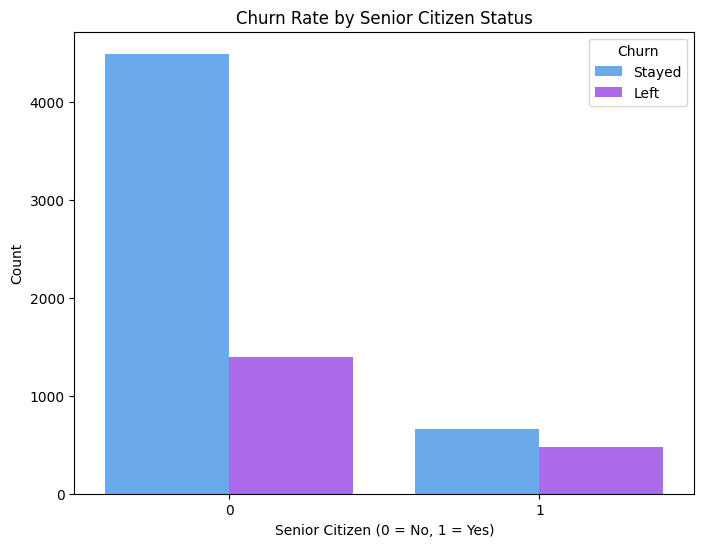

In [11]:
# ---- 5. Senior Citizen Status and Churn ----
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette="cool")
plt.title("Churn Rate by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.show()


Plot 6: Payment Method and Churn

    Heading: "Churn Rate by Payment Method"
    Description: Analyzing how different payment methods (credit card, electronic check, mailed check) affect churn rates.

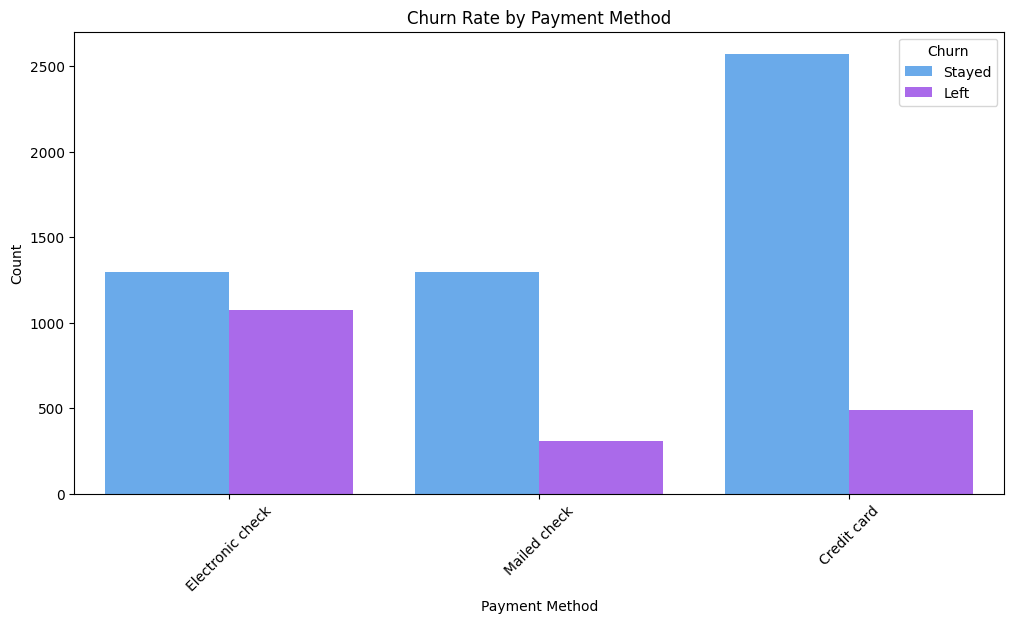

In [12]:
# ---- 6. Payment Method and Churn ----
df['PaymentMethod'] = df[['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].idxmax(axis=1)
df['PaymentMethod'] = df['PaymentMethod'].replace({
    'PaymentMethod_Credit card (automatic)': 'Credit card',
    'PaymentMethod_Electronic check': 'Electronic check',
    'PaymentMethod_Mailed check': 'Mailed check'
})

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette="cool")
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()


Plot 7: Phone Service vs. Churn

    Heading: "Churn Rate by Phone Service Subscription"
    Description: Investigating whether having a phone service subscription impacts churn rates.

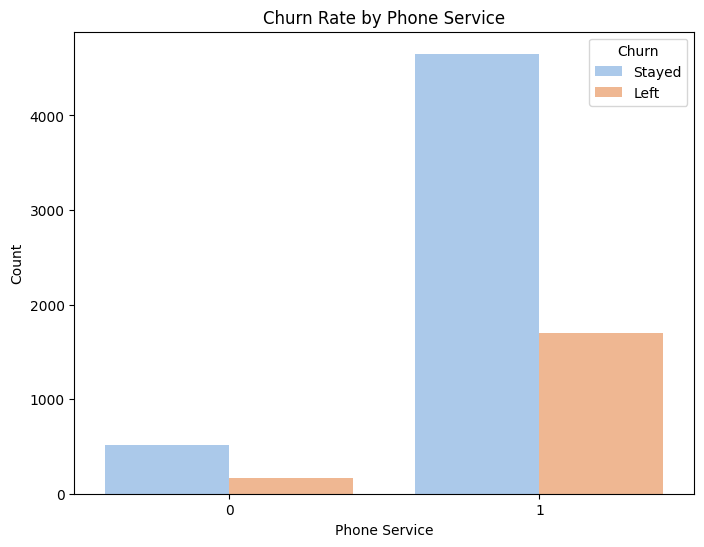

In [13]:
# ---- 7. Phone Service vs. Churn ----
df['PhoneService'] = df[['PhoneService_Yes']].fillna('No')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PhoneService_Yes', hue='Churn', palette="pastel")
plt.title("Churn Rate by Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['Stayed', 'Left'])
plt.show()



Plotly Visualization 1: 3D Scatter Plot for Churn Analysis

    Heading: "Customer Churn Analysis in 3D: Tenure, Monthly Charges, and Total Charges"
    Description: This 3D scatter plot visualizes customers' tenure, monthly charges, and total charges, colored by churn status to identify patterns among churned and non-churned customers.

In [14]:
import plotly.express as px
#  8 Create a 3D scatter plot with tenure, MonthlyCharges, and TotalCharges, colored by Churn status
fig = px.scatter_3d(
    df,
    x='tenure',
    y='MonthlyCharges',
    z='TotalCharges',
    color='Churn',  # Color by churn status
    title='Customer Churn Analysis: Tenure, Monthly Charges, and Total Charges',
    labels={'tenure': 'Tenure (Months)', 'MonthlyCharges': 'Monthly Charges ($)', 'TotalCharges': 'Total Charges ($)'},
    opacity=0.7,
    color_discrete_map={0: 'blue', 1: 'red'},  # Custom color map (Stayed: Blue, Left: Red)
    size_max=10
)

fig.show()


Plotly Visualization 2: Demographic Analysis in 3D

    Heading: "Demographic Analysis in 3D: Tenure and Monthly Charges by Gender and Senior Citizen Status"
    Description: This 3D scatter plot highlights the relationship between tenure, monthly charges, and total charges, segmented by senior citizen status (color) and gender (symbol).

In [15]:
#  9 Re-encode Gender and Senior Citizen Status for easy interpretation
df['Gender'] = df['gender'].replace({1: 'Female', 0: 'Male'})
df['SeniorCitizenStatus'] = df['SeniorCitizen'].replace({1: 'Senior', 0: 'Non-Senior'})

# Create a 3D scatter plot to analyze demographics with churn
fig = px.scatter_3d(
    df,
    x='tenure',
    y='MonthlyCharges',
    z='TotalCharges',
    color='SeniorCitizenStatus',  # Color by senior citizen status
    symbol='Gender',              # Different symbols for male/female
    title='Demographic Analysis: Tenure, Monthly Charges by Gender and Senior Citizen Status',
    labels={'tenure': 'Tenure (Months)', 'MonthlyCharges': 'Monthly Charges ($)', 'TotalCharges': 'Total Charges ($)'},
    opacity=0.7,
    color_discrete_map={'Senior': 'red', 'Non-Senior': 'green'}
)

fig.show()

Plot 8: Correlation Heatmap

    Heading: "Correlation Heatmap of Numerical Features"
    Description: Highlighting relationships between numerical features like tenure, monthly charges, and churn.

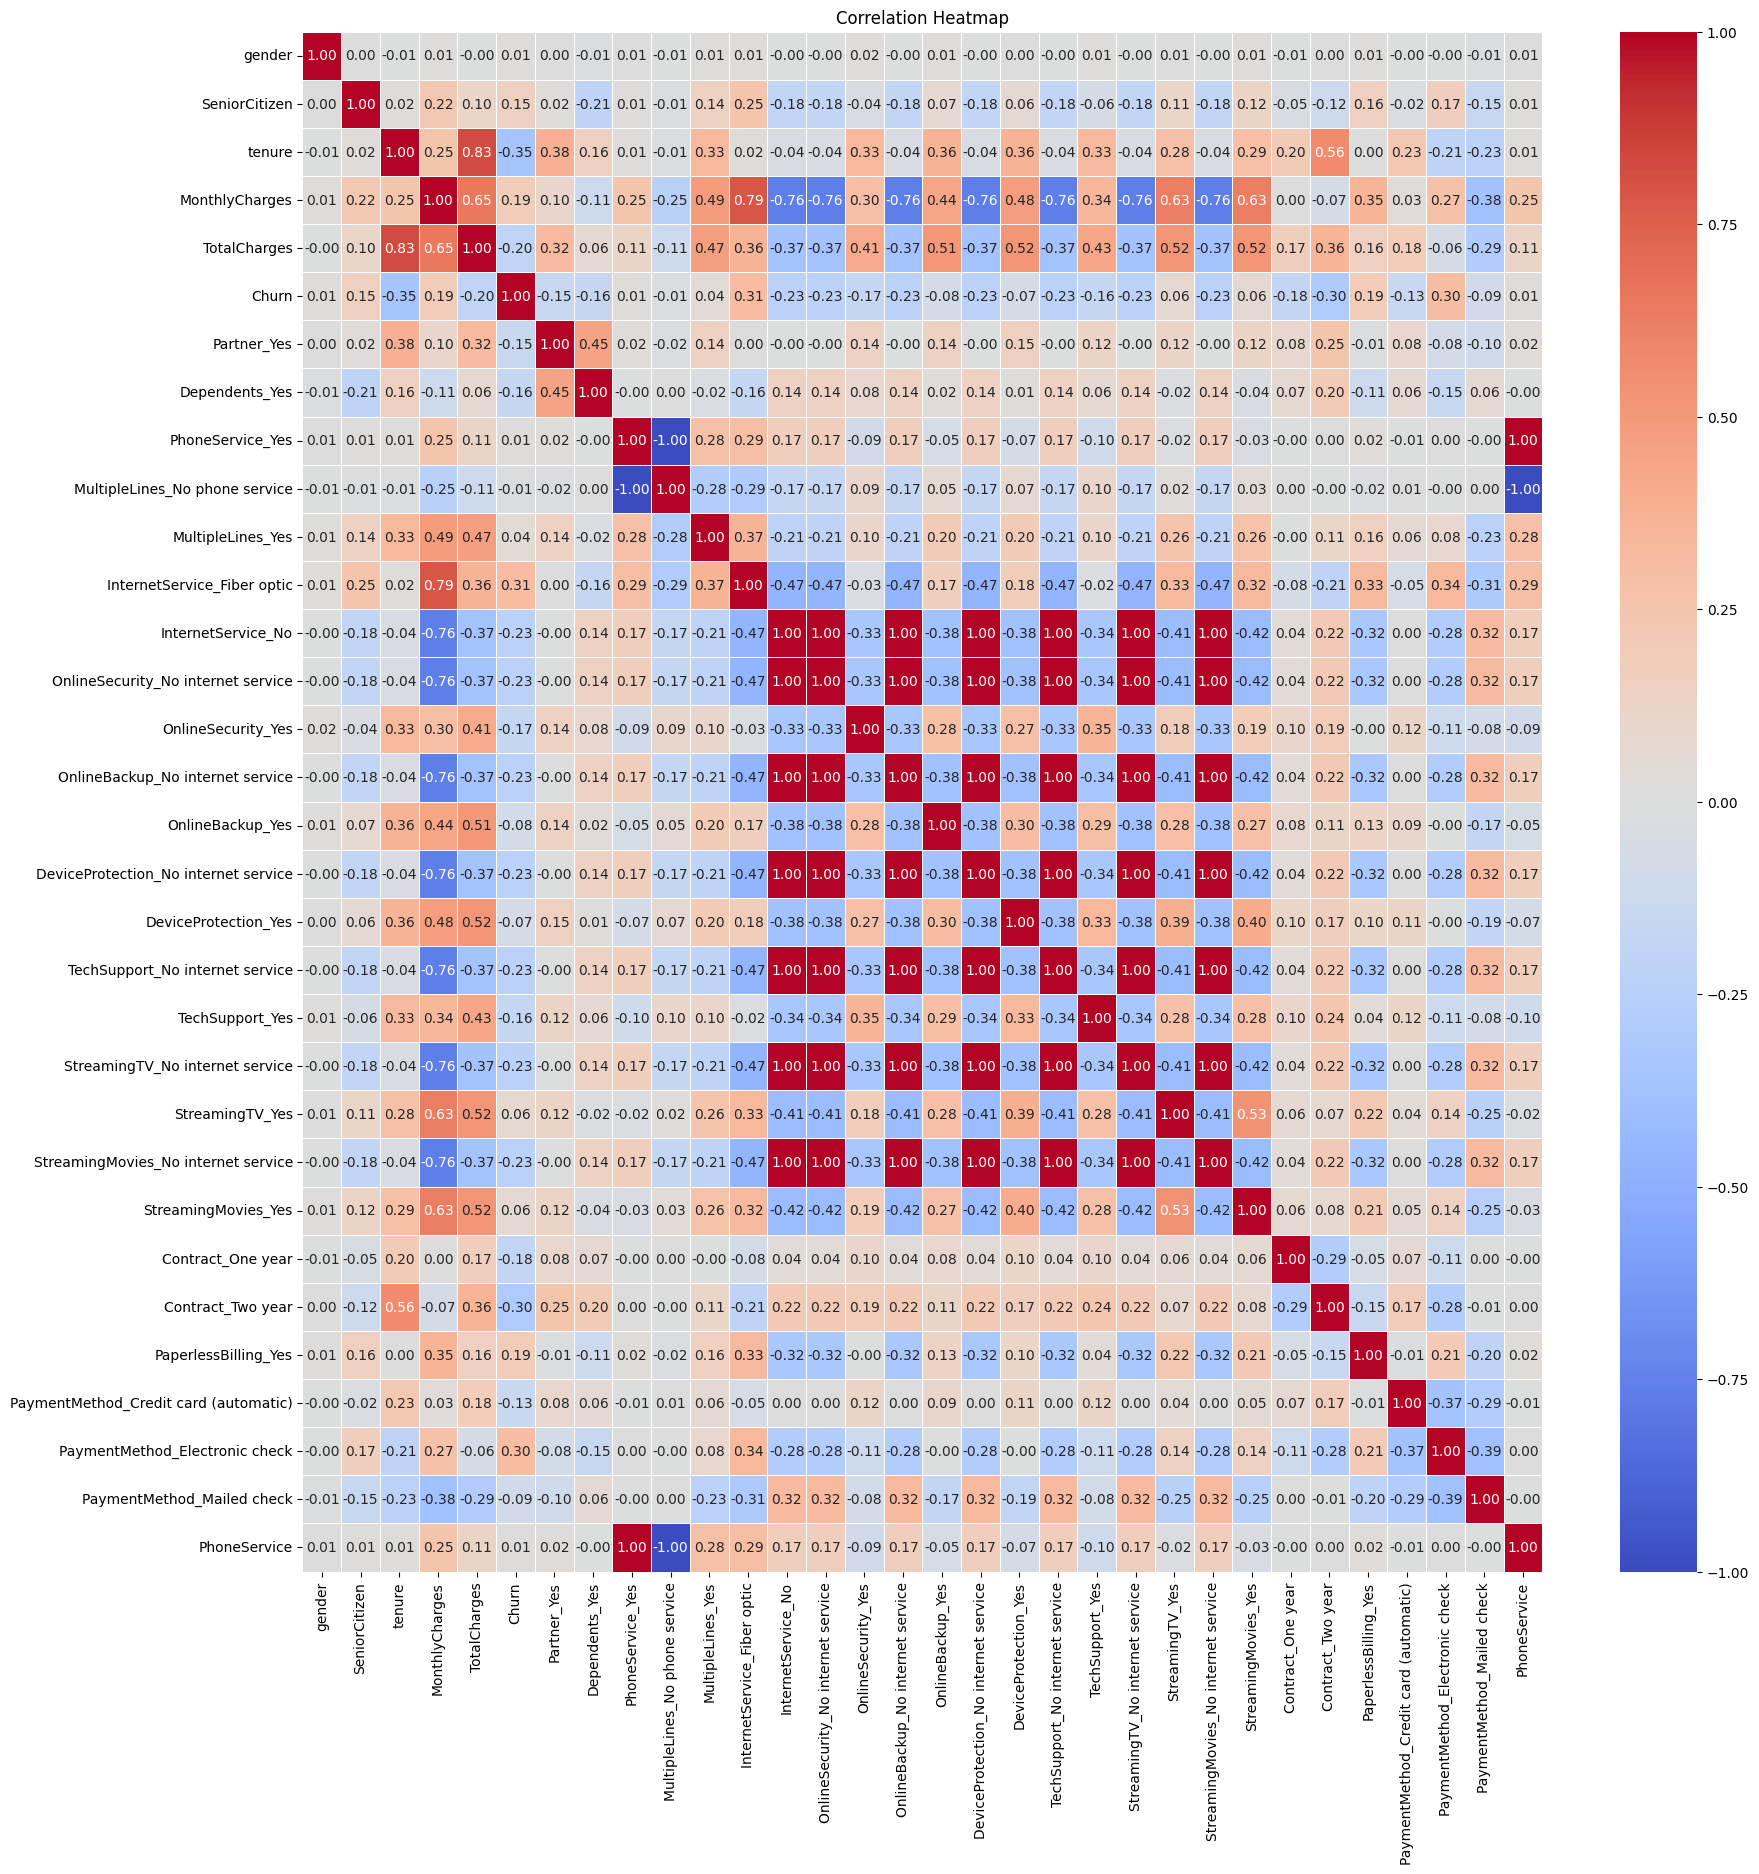

In [19]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Plot 9: Churn Proportion Pie Chart

    Heading: "Overall Churn Proportion"
    Description: Showing the percentage of customers who churned versus those who stayed.

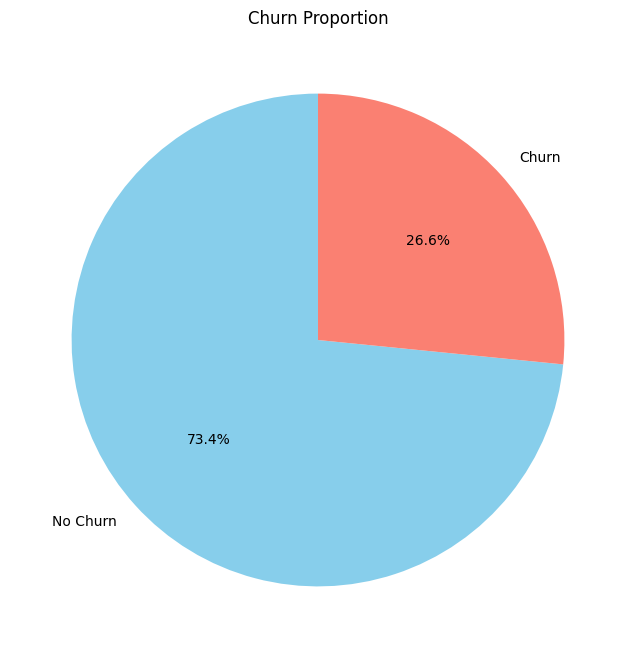

In [20]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Proportion')
plt.show()


Plot 10: Pairplot of Key Features by Churn

    Heading: "Feature Pairplot Colored by Churn Status"
    Description: Visualizing relationships between tenure, monthly charges, and total charges for churned and non-churned customers.

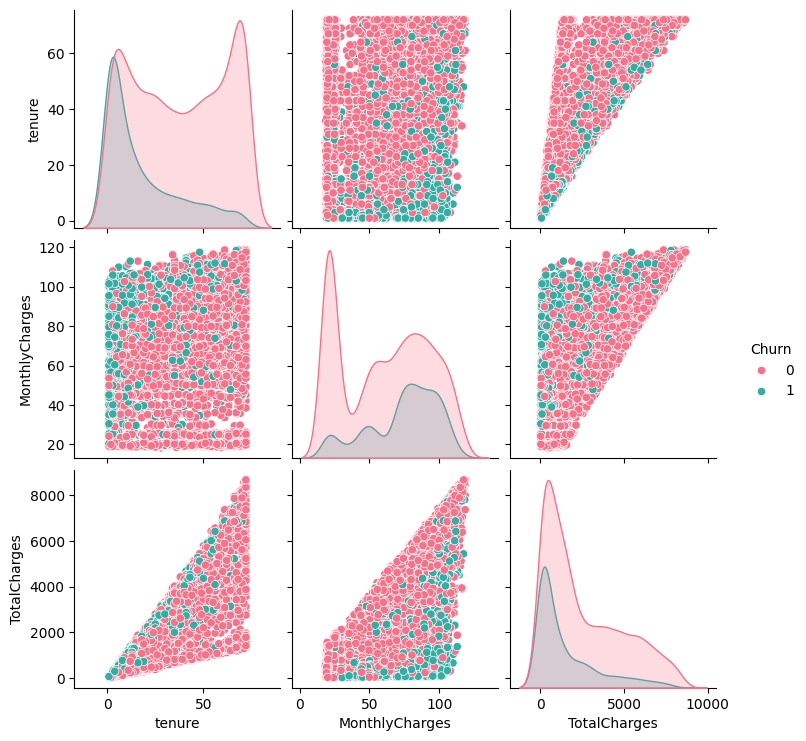

In [21]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='husl')
plt.show()


## Conclusion
- Customers with shorter tenure have higher churn rates.
- Month-to-month contracts are associated with higher churn.
- High monthly charges correlate with increased churn likelihood.
- Senior citizens and customers using electronic checks show higher churn rates.
